Name- Aditya Abhay Panditrao.
Reg No-22MCB0032

NAIVE BAYES

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [ ]:
df = pd.read_csv('/content/1429_1.csv',skiprows=[16022])
print(df)

                         id  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
34654  AVpfiBlyLJeJML43-4Tp   
34655  AVpfiBlyLJeJML43-4Tp   
34656  AVpfiBlyLJeJML43-4Tp   
34657  AVpfiBlyLJeJML43-4Tp   
34658  AVpfiBlyLJeJML43-4Tp   

                                                    name       asins   brand  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
...                                                  ...         ...     ...   
34654                                                NaN  B006GWO5W

<ipython-input-3-0fa116f04dcc>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/1429_1.csv',skiprows=[16022])
<ipython-input-3-0fa116f04dcc>:2: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(df)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34061 entries, 0 to 34623
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       34061 non-null  object
 1   1       34061 non-null  object
 2   2       34061 non-null  object
 3   3       34061 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [ ]:
df.keys()

RangeIndex(start=0, stop=4, step=1)

In [ ]:
column_names = df.columns.tolist()

print(column_names)

[0, 1, 2, 3]


In [ ]:
# Taking only useful data from dataset
df= df.iloc[:,[17,16,14,11]].values


Taking Care of missing data

In [ ]:
# Discarding observations having missing data
data = pd.DataFrame(df)
df = data.dropna(axis = 0,how = 'any')
X = df.iloc[:, :-1].values

In [ ]:
# Storing rating saperately to use it later
rating = X[:,-1]

In [ ]:
y = df.iloc[:, -1].values

In [ ]:
# Encoding True/False value as 1/0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

**Visualizing Dataset**

In [ ]:
df.head(-1)

,0,1,2,3
0,Kindle,This product so far has not disappointed. My c...,5.0,True
1,very fast,great for beginner or experienced person. Boug...,5.0,True
2,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,5.0,True
3,Good!!!,I've had my Fire HD 8 two weeks now and I love...,4.0,True
4,Fantastic Tablet for kids,I bought this for my grand daughter when she c...,5.0,True
...,...,...,...,...
34618,Wonderful unit,Can use it for best streaming. Can watch all t...,5.0,True
34619,Works great,I am now able to stream tv and movies from aro...,4.0,True
34620,the best,"best streaming device , very portable , amazin...",5.0,False
34621,Love it,Simply the best to watch tv series and movies....,5.0,True


In [ ]:
print(X)
print(y)

[['Kindle'
  'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'
  5.0]
 ['very fast'
  'great for beginner or experienced person. Bought as a gift and she loves it'
  5.0]
 ['Beginner tablet for our 9 year old son.'
  'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'
  5.0]
 ...
 ['Love it'
  'Simply the best to watch tv series and movies. It works even better if you are an Amazon Prime subscriber, with access to a many free goodies.'
  5.0]
 ['Try it, you will like it'
  'I was looking for ways to cut cost from a raising cable bill and a friend suggested I try the Amazon Fire. At first I didn���t know if this was something I could do. Once I was able to maneuver through the process, I love it.'
  4.0]
 ['Great little device'
  'I enjoy my kindle tv, it beats paying for cable every month ������'
  4.0]]
[1 1 1

Cleaning the Dataset

In [ ]:
import re
import nltk
# Downloading stopwords which does not having much significance
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Stemmer will reduce words in their root form
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
all_stopwords = stopwords.words('english')

In [ ]:
# Removing some stopwords which have significance effect in building this model
rem = ['not', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
       "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan',
       "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'don', "don't",
       'just', 'too', 'very', 'no', 'nor', 'only', 'own', 'same', 'again', 'against', 'but',]
for s in rem:
   all_stopwords.remove(s)

In [ ]:
def find_clean_text(temp):
  # Removing all characters other than alphabet
  temp = re.sub('[^a-zA-Z]', ' ', temp)
  temp = temp.lower()
  temp = temp.split()
  temp = [ps.stem(word) for word in temp if not word in set(all_stopwords)]
  temp = ' '.join(temp)
  return temp

In [ ]:
corpus = []
for i in range(X.shape[0]):
  # Concatanating both title and detailed review
  temp = X[i][0] + ' ' + X[i][1]
  temp = find_clean_text(temp)
  corpus.append(temp)

Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(corpus).toarray()

# Adding rating in the matrix of feature X
rating = rating.reshape(rating.shape[0],1)
X = np.append(X,rating,axis=1)

Splitting the dataset into the Training set and Test set

In [ ]:
# Splitting dataset into test set and train set which have equal percentage of data with both positive and negative review
#This is done as precautionary measure considering that very small number (approx 1300 out of 34000) data have negative review.
pos_x = []
pos_y = []
neg_x = []
neg_y = []
for i in range(X.shape[0]):
  if y[i]==1:
    pos_x.append(X[i])
    pos_y.append(y[i])
  else:
    neg_x.append(X[i])
    neg_y.append(y[i])

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(pos_x, pos_y, test_size = 0.20)
X_train, X_test, y_train, y_test = train_test_split(neg_x, neg_y, test_size = 0.20)

for i in range(len(X_train1)):
  X_train.append(X_train1[i])
  y_train.append(y_train1[i])
for i in range(len(X_test1)):
  X_test.append(X_test1[i])
  y_test.append(y_test1[i])
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

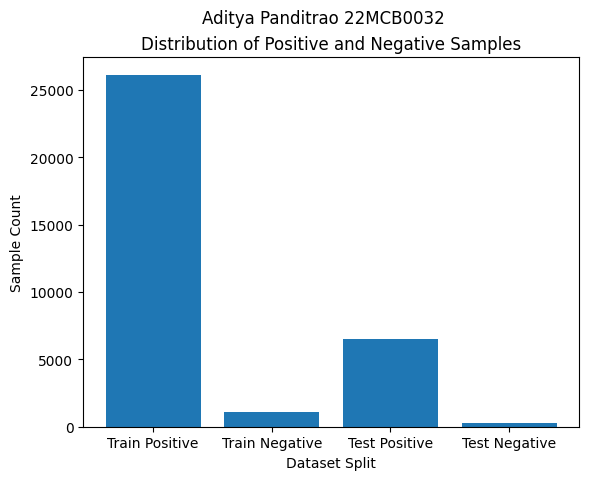

In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive and negative samples in each set
train_pos_count = sum(y_train == 1)
train_neg_count = sum(y_train == 0)
test_pos_count = sum(y_test == 1)
test_neg_count = sum(y_test == 0)

# Create the bar plot
labels = ['Train Positive', 'Train Negative', 'Test Positive', 'Test Negative']
counts = [train_pos_count, train_neg_count, test_pos_count, test_neg_count]

plt.bar(labels, counts)
plt.xlabel('Dataset Split')
plt.ylabel('Sample Count')
plt.title('Distribution of Positive and Negative Samples')
plt.suptitle("Aditya Panditrao 22MCB0032")

# Display the plot
plt.show()

**Training the Multinomial Naive Bayes model on the Training set**


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Result on training set :')
print('Confusion matrix :')
print(confusion_matrix(y_train,classifier.predict(X_train)))
print('accuracy : ',accuracy_score(y_train, classifier.predict(X_train)))

print('Result on test set :')
y_pred = classifier.predict(X_test)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('accuracy',accuracy_score(y_test, y_pred))

Result on training set :
Confusion matrix :
[[  777   330]
 [  904 25237]]
accuracy :  0.954712272460364
Result on test set :
Confusion matrix :
[[ 187   90]
 [ 262 6274]]
accuracy 0.9483340672244239


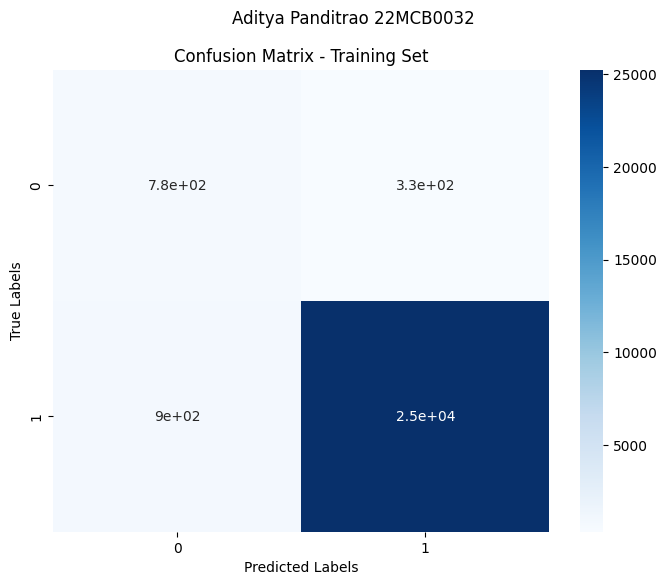

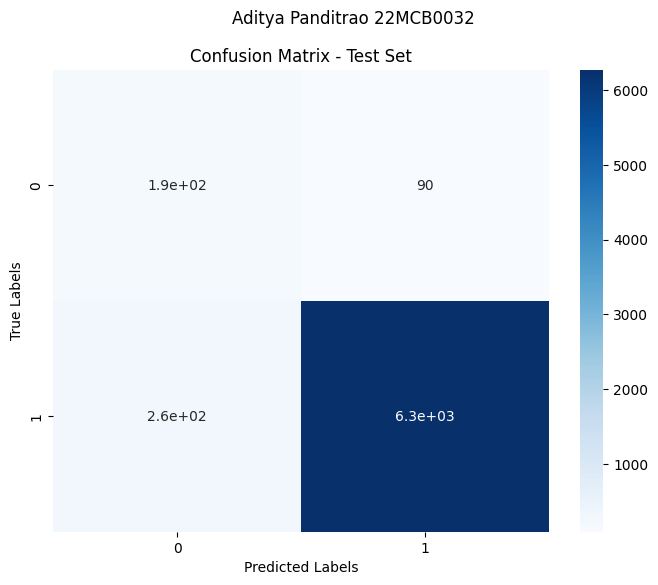

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix for training set
train_cm = confusion_matrix(y_train, classifier.predict(X_train))
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.suptitle("Aditya Panditrao 22MCB0032")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot confusion matrix for test set
test_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.suptitle("Aditya Panditrao 22MCB0032")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
